## Species Observation Trends

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [68]:
# cleaned camera trap data
camera_data = pd.read_csv("../data/cleaned/camera_trap_cleaned.csv")

In [35]:
# Quick look at the data
camera_data.head()


,FILENAME,SPECIES,COUNT,SEX,x-y coordinate,latitude,longitude
0,snapshot_201910831124745.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962333",-0.390381,36.962333
1,snapshot_201910831124667.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962333",-0.390381,36.962333
2,snapshot_201910831124823.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962333",-0.390381,36.962333
3,snapshot_2019108311250252.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962334",-0.390381,36.962334
4,snapshot_2019108311251231.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962335",-0.390381,36.962335


In [69]:
# Aggregate total counts per species
species_counts = camera_data.groupby("SPECIES")["COUNT"].sum().sort_values(ascending=False)

# counts
print(species_counts)

SPECIES
ZEBRA            242
IMPALA           239
WARTHOG           52
IMPALA, ZEBRA      4
WATERBUCK          4
Name: COUNT, dtype: int64


In [39]:
# single-species observations
trend_data = camera_data[
    ~camera_data["SPECIES"].str.contains(",", regex=False)
].copy()

In [40]:
# Check species 
trend_data["SPECIES"].value_counts()

SPECIES
IMPALA       156
ZEBRA        138
WARTHOG       23
WATERBUCK      4
Name: count, dtype: int64

In [70]:
# observation index
trend_data = trend_data.reset_index(drop=True)
trend_data["observation_id"] = trend_data.index + 1

trend_data.head()


,FILENAME,SPECIES,COUNT,SEX,x-y coordinate,latitude,longitude,observation_id
0,snapshot_201910831124745.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962333",-0.390381,36.962333,1
1,snapshot_201910831124667.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962333",-0.390381,36.962333,2
2,snapshot_201910831124823.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962333",-0.390381,36.962333,3
3,snapshot_2019108311250252.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962334",-0.390381,36.962334,4
4,snapshot_2019108311251231.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962335",-0.390381,36.962335,5


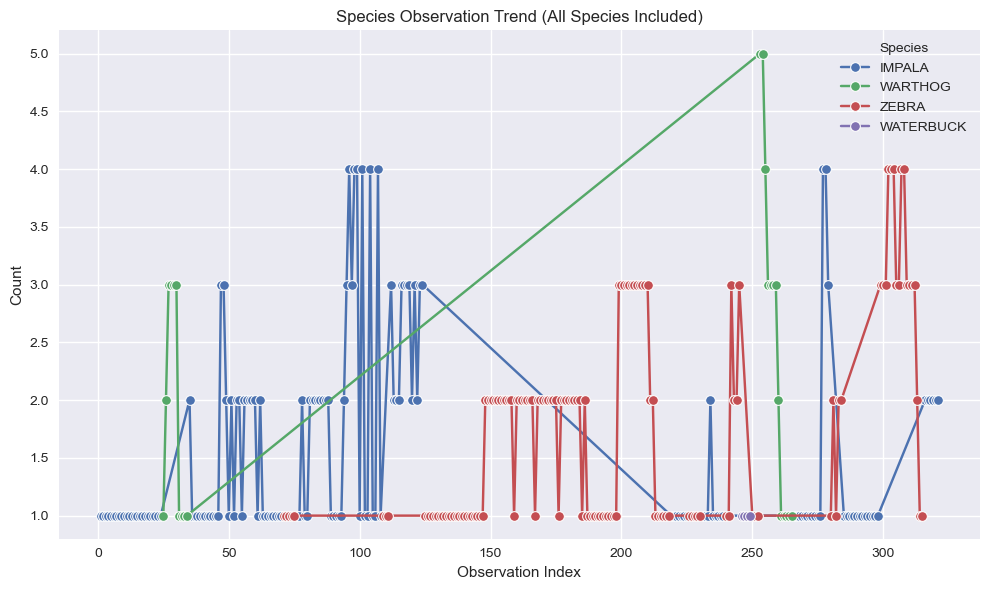

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.lineplot(
    data=trend_data,
    x="observation_id",
    y="COUNT",
    hue="SPECIES",
    marker="o"
)

plt.title("Species Observation Trend (All Species Included)")
plt.xlabel("Observation Index")
plt.ylabel("Count")
plt.legend(title="Species")
plt.tight_layout()

plt.savefig(
    "../outputs/figures/fig1_species_trend_all_species.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()
plt.close()



**Figure 1.**

In [43]:
# Remove very low-frequency species for visualization clarity
filtered_trend_data = trend_data[
    ~trend_data["SPECIES"].isin(["WATERBUCK"])
].copy()

filtered_trend_data["SPECIES"].value_counts()


SPECIES
IMPALA     156
ZEBRA      138
WARTHOG     23
Name: count, dtype: int64

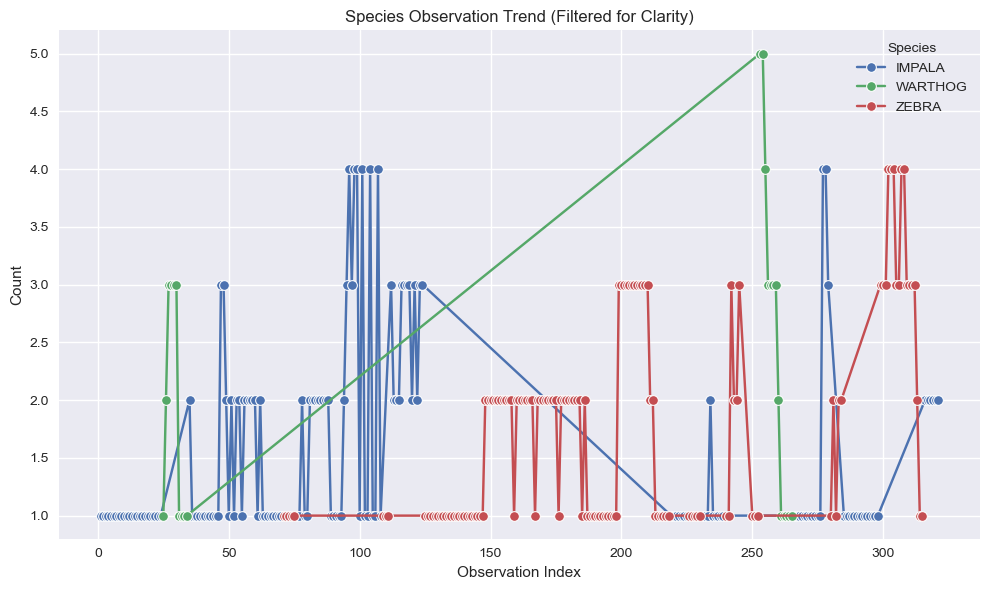

In [78]:
plt.figure(figsize=(10,6))

sns.lineplot(
    data=filtered_trend_data,
    x="observation_id",
    y="COUNT",
    hue="SPECIES",
    marker="o"
)

plt.title("Species Observation Trend (Filtered for Clarity)")
plt.xlabel("Observation Index")
plt.ylabel("Count")
plt.legend(title="Species")
plt.tight_layout()

plt.savefig(
    "../outputs/figures/fig2_species_trend_filtered.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
plt.close()

**Figure 2.**

In [47]:
trend_clean["cumulative_count"] = (
    trend_clean
    .groupby("SPECIES")["COUNT"]
    .cumsum()
)


In [48]:
trend_clean.head()


,FILENAME,SPECIES,COUNT,SEX,x-y coordinate,latitude,longitude,cumulative_count
0,snapshot_201910831124745.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962333",-0.390381,36.962333,1
1,snapshot_201910831124667.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962333",-0.390381,36.962333,2
2,snapshot_201910831124823.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962333",-0.390381,36.962333,3
3,snapshot_2019108311250252.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962334",-0.390381,36.962334,4
4,snapshot_2019108311251231.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962335",-0.390381,36.962335,5


In [51]:
trend_clean.columns


Index(['FILENAME', 'SPECIES', 'COUNT', 'SEX', 'x-y coordinate', 'latitude',
       'longitude', 'cumulative_count'],
      dtype='object')

In [52]:
trend_clean.head()


,FILENAME,SPECIES,COUNT,SEX,x-y coordinate,latitude,longitude,cumulative_count
0,snapshot_201910831124745.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962333",-0.390381,36.962333,1
1,snapshot_201910831124667.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962333",-0.390381,36.962333,2
2,snapshot_201910831124823.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962333",-0.390381,36.962333,3
3,snapshot_2019108311250252.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962334",-0.390381,36.962334,4
4,snapshot_2019108311251231.jpg,IMPALA,1,FEMALE,"-0.390381, 36.962335",-0.390381,36.962335,5


In [54]:
"cumulative_count" in trend_clean.columns


True

In [55]:
trend_clean = trend_clean.sort_values(
    by=["SPECIES", "cumulative_count"]
)


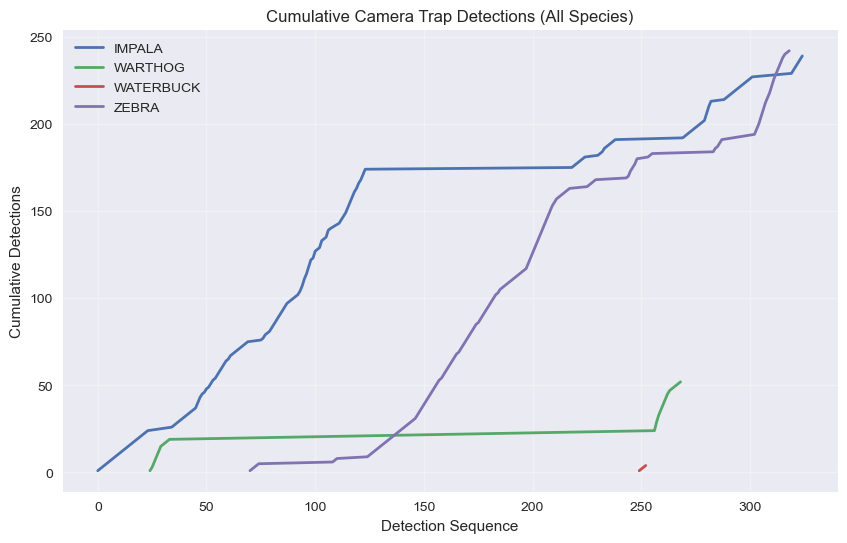

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for species in trend_clean["SPECIES"].unique():
    subset = trend_clean[trend_clean["SPECIES"] == species]
    plt.plot(
        subset["cumulative_count"],
        label=species,
        linewidth=2
    )

plt.xlabel("Detection Sequence")
plt.ylabel("Cumulative Detections")
plt.title("Cumulative Camera Trap Detections (All Species)")
plt.legend()
plt.grid(alpha=0.3)

plt.savefig(
    "../outputs/figures/fig3_cumulative_detections_all_species.png",
    dpi=300,
    bbox_inches="tight"
)  
    
plt.show()
plt.close()

**Figure 3.** Cumulative species detection curves derived from camera trap
observations, illustrating species-wise accumulation of detections with
increasing sampling effort.


### Sampling Sufficiency Interpretation


Cumulative detection curves were generated for the recorded species to assess sampling sufficiency across camera trap observations (Figure 3). For Impala and Zebra, the cumulative counts increased steadily during the initial phase of sampling and subsequently showed a clear tendency towards plateauing, indicating that additional observations contributed relatively fewer new detections. This pattern suggests that the sampling effort was sufficient to capture the majority of detections for these commonly occurring species.

In contrast, Warthog and Waterbuck exhibited comparatively shallow cumulative curves, with lower overall counts and no clear plateau. These patterns indicate limited detections rather than true absence and suggest that sampling effort may have been insufficient to reliably characterize less frequently detected species. Occasional co-detection records (e.g., Impala–Zebra) were rare and contributed minimally to the overall detection trends.

Overall, the cumulative detection curves indicate adequate sampling sufficiency for dominant species within the study area, while highlighting reduced detectability and potential under-sampling for rarer species.

In [62]:
species_counts = trend_clean.groupby("SPECIES")["COUNT"].sum()
species_counts


SPECIES
IMPALA       239
WARTHOG       52
WATERBUCK      4
ZEBRA        242
Name: COUNT, dtype: int64

In [64]:
filtered_trend = trend_clean[
    (~trend_clean["SPECIES"].isin(["WATERBUCK", "IMPALA, ZEBRA"]))
]


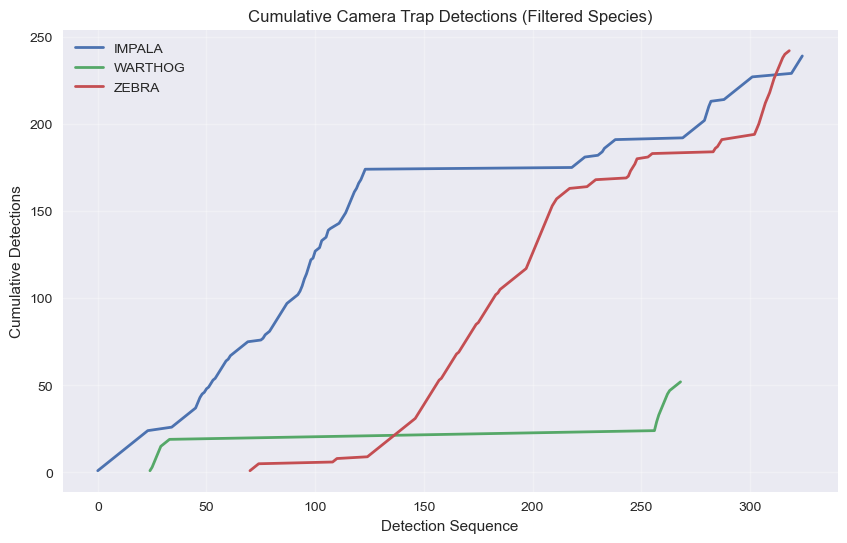

In [80]:
plt.figure(figsize=(10, 6))

for species in filtered_trend["SPECIES"].unique():
    subset = filtered_trend[filtered_trend["SPECIES"] == species]
    plt.plot(
        subset["cumulative_count"],
        label=species,
        linewidth=2
    )

plt.xlabel("Detection Sequence")
plt.ylabel("Cumulative Detections")
plt.title("Cumulative Camera Trap Detections (Filtered Species)")
plt.legend()
plt.grid(alpha=0.3)

plt.savefig(
    "../outputs/figures/fig4_cumulative_detections_filtered.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
plt.close()

**Figure 4.** Cumulative species detection curves derived from camera trap
observations without low-n species (WATERBUCK)


The cumulative detection curves show a clear pattern of increasing observations
with sampling effort for the dominant species recorded by the camera traps.
Impala and zebra exhibit steep initial accumulation, suggesting that sampling effort was sufficient to capture
their presence within the study area. Warthog detections increase more slowly,
reflecting lower encounter rates but still show a consistent upward trend.

This pattern is consistent with adequate sampling coverage for
common species, while rarer species may require increased effort or targeted
survey design for reliable detection.
